### 先找一筆資料測試輸出結果：

In [1]:
from tensorflow import keras
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
#圖取整個之前train好的模型
model = keras.models.load_model('model.h5')

In [3]:
#把圖片放在跟程式一樣的目錄
path = './134.jpg'

In [4]:
#開啟圖片
img = Image.open(path)

#另存一個resize版本(符合inecption_v3的input shape)
img_resized = img.resize((299, 299))

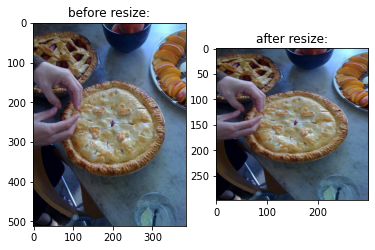

In [5]:
plt.subplot(1, 2, 1)
plt.title("before resize:")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("after resize:")
plt.imshow(img_resized)

In [6]:
#normalization
img_resized_normalized = ((np.array(img_resized)/255)-0.5)*2
print("Before dimention expand, image shape =")
print(img_resized_normalized.shape)
print("")

#擴增輸入資料維度，以符合input格式
img_for_prediction = np.expand_dims(img_resized_normalized, axis=0)
print("After dimention expand, image shape =")
print(img_for_prediction.shape)

Before dimention expand, image shape =
(299, 299, 3)

After dimention expand, image shape =
(1, 299, 299, 3)


In [7]:
#把前處理好的資料輸入load進來的model
prediction_arr = model.predict(img_for_prediction)
print(prediction_arr)

[[3.8408199e-01 1.5687670e-04 1.5134861e-02 7.2873983e-05 5.5596040e-04
  2.0041896e-05 6.7866623e-04 1.6473285e-05 8.6287754e-03 4.7992944e-04
  3.6620497e-04 5.7167716e-05 1.9974359e-04 3.8458461e-06 6.2180852e-04
  1.4525823e-03 6.9028977e-04 1.4840231e-03 2.2652702e-02 4.8992611e-03
  8.6797059e-05 3.5248618e-04 9.1016642e-04 1.1049945e-04 2.2619825e-02
  6.2190164e-05 3.4400052e-04 8.8715982e-03 2.4923165e-05 3.0882476e-04
  4.5140524e-04 4.4563168e-04 5.5722333e-02 1.0615660e-04 8.1555016e-05
  1.8828395e-01 1.9964769e-03 7.5622869e-04 6.7996222e-04 3.3733330e-03
  6.9868786e-04 4.8999310e-02 4.4114463e-04 5.7802326e-04 1.8690834e-04
  3.4506887e-05 3.2027152e-03 2.5366810e-03 1.5492762e-05 1.7972124e-03
  3.8377804e-04 5.9336727e-03 1.0944360e-02 8.9814060e-04 1.5061321e-03
  9.6580893e-04 1.9169826e-03 1.5907684e-02 7.1354292e-04 3.0166467e-03
  7.3132887e-03 2.6483010e-04 1.4256103e-02 8.5971715e-06 1.1937710e-03
  3.0131562e-04 2.1698531e-03 1.3759076e-02 3.0068884e-04 4.5873

In [8]:
#這是之前train時 .flow_from_directory 使用 .class_indices 找到的label
dictionary = {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50, 'guacamole': 51, 'gyoza': 52, 'hamburger': 53, 'hot_and_sour_soup': 54, 'hot_dog': 55, 'huevos_rancheros': 56, 'hummus': 57, 'ice_cream': 58, 'lasagna': 59, 'lobster_bisque': 60, 'lobster_roll_sandwich': 61, 'macaroni_and_cheese': 62, 'macarons': 63, 'miso_soup': 64, 'mussels': 65, 'nachos': 66, 'omelette': 67, 'onion_rings': 68, 'oysters': 69, 'pad_thai': 70, 'paella': 71, 'pancakes': 72, 'panna_cotta': 73, 'peking_duck': 74, 'pho': 75, 'pizza': 76, 'pork_chop': 77, 'poutine': 78, 'prime_rib': 79, 'pulled_pork_sandwich': 80, 'ramen': 81, 'ravioli': 82, 'red_velvet_cake': 83, 'risotto': 84, 'samosa': 85, 'sashimi': 86, 'scallops': 87, 'seaweed_salad': 88, 'shrimp_and_grits': 89, 'spaghetti_bolognese': 90, 'spaghetti_carbonara': 91, 'spring_rolls': 92, 'steak': 93, 'strawberry_shortcake': 94, 'sushi': 95, 'tacos': 96, 'takoyaki': 97, 'tiramisu': 98, 'tuna_tartare': 99, 'waffles': 100}

In [9]:
#找出prediction_arr矩陣的最大值，並以此找出label dictionary的對應值，即為最後預測label
print(list(dictionary.keys())[np.argmax(prediction_arr)])

apple_pie


### 預測整個test folder，並繪製confusion matrix

In [10]:
def preprocess(path):
    img = Image.open(path)
    img = img.resize((299, 299))
    img = ((np.array(img)/255)-0.5)*2
    img = np.expand_dims(img, axis=0)
    return img

In [11]:
test_path = './test'
labels = os.listdir(test_path)
print(labels)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [12]:
prediction_arr_all = []
true_arr_all = []
correct_num = 0
total_num = 0
for true_label in labels:
    for img in tqdm(os.listdir(test_path + '/' + true_label)):
        try:
            img_for_prediction = preprocess(test_path + '/' + true_label + '/' + img)
            arr = model.predict(img_for_prediction)
            predict_label = list(dictionary.keys())[np.argmax(arr)]
            prediction_arr_all.append(predict_label)
            true_arr_all.append(true_label)
            if(list(dictionary.keys())[np.argmax(arr)] == true_label):
                correct_num+=1
            total_num+=1
        except:
            print("There's something wrong with " + true_label + '/' + img)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.98it/s]


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:05<00:01, 15.10it/s]

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:05<00:01, 15.81it/s]

There's something wrong with steak/1340977.jpg


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.37it/s]


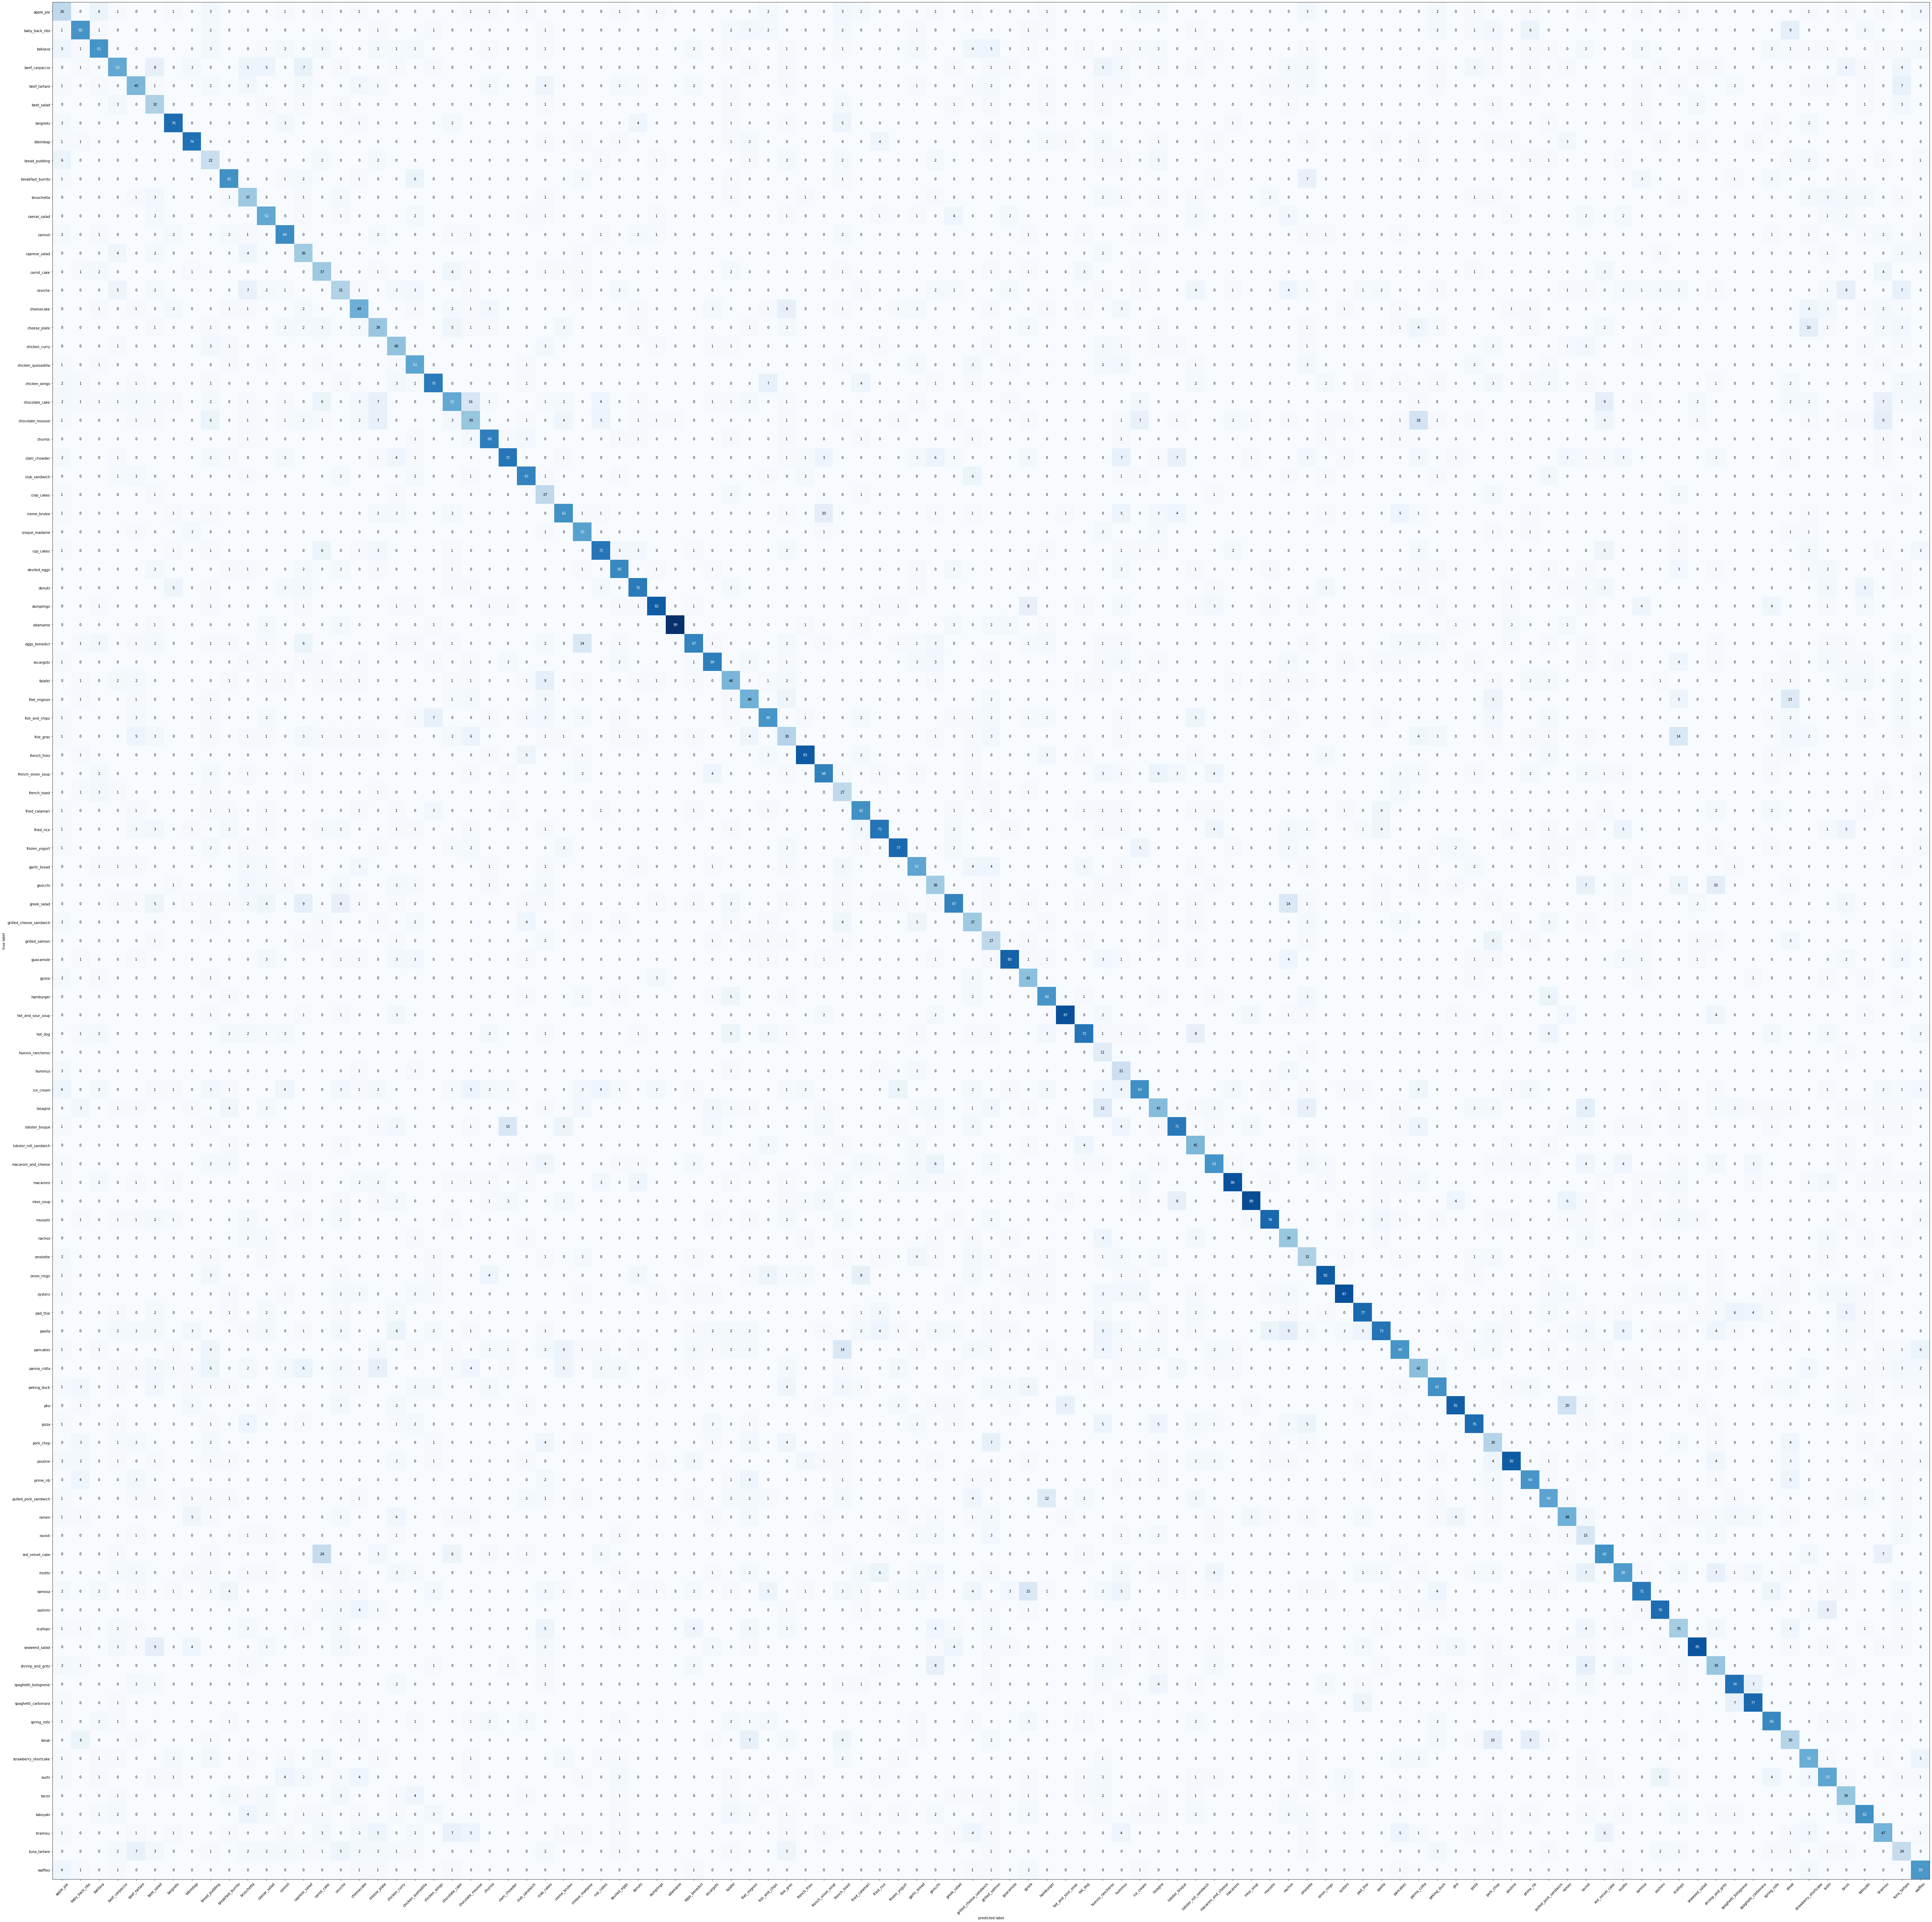

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(prediction_arr_all, true_arr_all)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(100,100), class_names=labels, cmap=plt.cm.Blues)
plt.show()
fig.savefig('plot_confusion_matrix.png')

In [14]:
print("accuracy on test set = " + str(correct_num/total_num))

accuracy on test set = 0.5634221210020794
